# Phase 1 Project

## Introduction

Congratulations on completing phase 1! In this notebook, you will complete a final project that applies your python and visualization skills to real word business data. 

## Objectives 
In this project, you will...
- Read in data that has been stored as a `json` file.
- Describe how the data is structured.
- Use Python to filter a nested data structure
- Define python functions
- Calculate descriptive statistics
- Visualize data via matplotlib


# Task: Compare New York Pizza Restaurants with Above Average and Below Average Ratings
![Pizza gif](https://media.giphy.com/media/eK1eFdpj5kMWqZ9bLJ/giphy.gif?cid=ecf05e47rkbp48nwz3za6dloo8xfwzueu0rx2vklguo7xyhu&rid=giphy.gif&ct=g)

## Business Understanding 

A client at your analytics firm is considering opening a pizza restaurant in New York City. 

They have asked you to develop a business intelligence report to fact check the following claims:
1. Your client wants to ensure they have an above average Yelp rating. They have previously owned restuarants in other cities, where a `3` was the average. They would like to know if that holds true in New York City. 
1. Your client has noticed that restaurants on yelp with a high review count seem to be quite successful. They have decided to focus on maximizing their review count which they believe will allow them to have an above average overall review. 
1. After looking at a few restaurants on Yelp, your client believes that most above average restaurants have a price point of `$$`. They are considering increasing their prices from `$` to `$$` to match the majority of above average restaurants, and would like you to find the most common price point for above average restaurants in New York City.
1. In terms of location they have been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. They would like you to determine if the data supports this claim.
1. They believe that the `10012` zipcode in New York City is the best place to open a restaurant. They wish to open a restaurant in close proximity to other highly rated restaurants, and they believe `10012` has the most in NYC.



The primary purpose of this analysis is _descriptive_, meaning your analysis should report calculated statistics such as `counts` and `mean`, and should be focused on providing a simple, factual, understanding of the data. 


## Data Understanding

You have been provided a Yelp dataset containing information about restaurants in New York City. The data is named `pizza_businesses.json` and is stored in the current working directory. You will need to load in this dataset, inspect how the data is structured, and use the provided information to fact check your client's claims. 

## Load the data

A dataset containing information about New York pizza restaurants is stored in this notebook's repository with the name `pizza_businesses.json`.

In the cell below, load the json data into a python dictionary.

In [1]:
# Import the json python package
import json

# Load in the data
with open('pizza_businesses.json') as p:
    pizza_data = json.load(p)
    print(type(pizza_data))

<class 'list'>


## Describe the data

Now that you've loaded in the dataset, the structure of the data should be inspected.

In the cell below, evaluate 
- The datatype of the overall dataset
- The datatype of a single observation
- The number of observations, and then
- Isolate the first observation in the dataset

In [2]:
# Replace None with your code!

# Find the datatype for the overall dataset
dataset_type = type(pizza_data)
# Isolate the first observation
first_observation = pizza_data[0]
# Find the datatype for the first observation
observation_type = type(pizza_data[0])
# How many observations are there
num_observations = len(pizza_data)

In [3]:
print(num_observations)

1000


Run this following cell unchanged to print out descriptive information for the dataset!

In [4]:
from pprint import pprint

print(f'The dataset is a \033[1m{dataset_type}\033[0m')
print(f'The observations are a \033[1m{observation_type}\033[0m',)
print(f'There are \033[1m{num_observations} observations.\033[0m')
print('\033[1m\nThe first observation:\033[0m')
print('==========================================')
pprint(first_observation)
print('==========================================')

The dataset is a <class 'list'>
The observations are a <class 'dict'>
There are 1000 observations.

The first observation:
{'latitude': 40.72308755605564,
 'location': {'address1': '27 Prince St',
              'address2': None,
              'address3': '',
              'city': 'New York',
              'country': 'US',
              'display_address': ['27 Prince St', 'New York, NY 10012'],
              'state': 'NY',
              'zip_code': '10012'},
 'longitude': -73.99453001177575,
 'name': 'Prince Street Pizza',
 'phone': '+12129664100',
 'price': '\\$',
 'rating': 4.5,
 'review_count': 3976,
 'transactions': ['delivery', 'pickup']}


## Find the possible rating options. 

In the cell below, create a variable called `rating_options` that has a [set datatype](https://realpython.com/python-sets/), and is a unique collection of the possible ratings a restaurant can recieve.

In [5]:
# Create the `rating_options` variable
rating_options = set()

# Loop over all of the observations in the dataset
for pizza_shop in pizza_data:
    # Isolate the rating for the restaurant
    rating = pizza_shop['rating']
    # Add the rating to 
    # the `rating_options` variable
    rating_options.add(rating)

    # could also skip the isolation part and write 
    # rating_options.add(pizza_shop['rating'])
    
    
rating_options

{1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [6]:
assert type(rating_options) == set
assert len(rating_options) == 8
assert list(rating_options)[0] != list(rating_options)[1]

## Plot the distribution for ratings

Now that you know what rating options are available, in the cell below plot a histogram showing the distribution of ratings. 

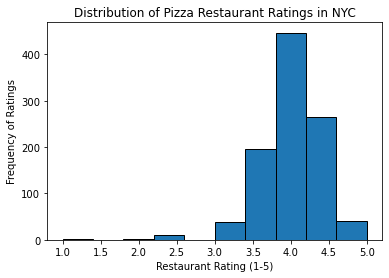

In [7]:
# Import matplotlib's pyplot module
import matplotlib.pyplot as plt

# Create an empty list.
# We will store all ratings in this list
ratings = []

# Loop over every restaurant in the dataset
for pizza_shop in pizza_data:
    # Isolate the rating
    # Append the rating to the `ratings` list
    ratings.append(pizza_shop['rating'])


# Create a matplotlib subplot

fig, ax = plt.subplots()


# Plot a histogram of the ratings list

ax.hist(ratings, edgecolor="black")

ax.set_title("Distribution of Pizza Restaurant Ratings in NYC")
ax.set_xlabel("Restaurant Rating (1-5)")
ax.set_ylabel("Frequency of Ratings");



In [8]:
# Check the median
import numpy as np
ratings_median = np.median(ratings)
print('Median Rating:',ratings_median)

# Check the mean
ratings_average = np.average(ratings)
print('Average Rating:',ratings_average)


Median Rating: 4.0
Average Rating: 4.016


**Interpret the ratings histogram. How does the visualization relate to your client's claims?**

The client wants to ensure they have an above average Yelp rating.
The histogram graph above shows that restaurants in New York City have an above average rating, the frequancy of rating lies between 3.5-4.5. We can check that by calculating the median which is 4.0, and the mean is roughly the same.

## Isolate the restaurants with an above average rating

Now that you have an understanding for what is an average rating, next you will isolate restaurants with above average and below average ratings so you can compare them.

In the cell below, filter out all restaurants that do not have a rating of at least `4.5`.

In [9]:
# Create an empty list
# You will store restaurants in this list
above_average = []

# Loop over the dataset
for pizza_shop in pizza_data:
    # Isolate the rating
    rating=pizza_shop['rating']
    # Check if the rating is at least 4.5
    if rating >= 4.5:
        # If the rating is at least 4.5
        # Add the restaurant to the list
        above_average.append(pizza_shop)
        


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [10]:
assert type(above_average) == list
assert type(above_average[0]) == dict
assert len(above_average) == 306

## Isolate restaurants with a below average rating

Now repeat the process for below average ratings.

In the cell below, isolate restaurants that have a rating of no more than `3.5`.

In [11]:
# Create an empty list
# You will store restaurants in this list
below_average = []

# Loop over the restaurants in the dataset
for pizza_shop in pizza_data:
    # Isolate the rating
    rating=pizza_shop['rating']
    
    # Check if the rating is no more than 3.5
    if rating <= 3.5:
        # If the rating no more than 3.5
        # Add the restaurant to the list
        below_average.append(pizza_shop)

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [12]:
assert type(below_average) == list
assert type(below_average[0]) == dict
assert len(below_average) == 247

## Calculate average review counts for both groups

Now that you've isolated above average and below average restaurants, you can calculate the average number of reviews received by both groups.

To do this, you will need to isolate the review counts for both groups, and calculate their average. 

The code for isolating the review counts will look very similar to code you have previously written, which is a good sign that a function should be defined!

In the cell below, define a function called `isolate_values` that receives two arguments:
1. A list of dictionaries
2. A string indicating the key that should be isolated for each dictionary

This function should:
- Loop over every dictionary in the inputted list
- Pull out the value assigned to the inputted key
- Append the value to a new list
- Return the new list of values

In [13]:
def isolate_values(dictionaries, key):
    # Create an empty list
    # for storing data
    results = []
    
    # Loop over every dicionary 
    for item in dictionaries:
        
        # Isolate the value of the dictionary with the `key`
        value = item[key]
        
        # Append the value to the list
        results.append(value)
    
    # Return the list of values
    return results

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [14]:
from types import FunctionType

assert type(isolate_values) == FunctionType
assert type(isolate_values([{'test': 1}], 'test')) == list
assert len(isolate_values([{'test': 1}], 'test')) == 1
assert len(isolate_values(above_average, 'name')) == len(above_average)
assert isolate_values(above_average, 'name')[-1] == above_average[-1]['name']

Now use the `isolate_values` function to create a list called `abv_avg_rev_cnts` that contains the review counts for every above average restaurant.

In [15]:
# Replace None with your code
abv_avg_rev_cnts = isolate_values(above_average, 'review_count')

Now use the `isolate_values` function to create a list called `blw_avg_rev_cnts` that contains the review counts for every below average restaurant.

In [16]:
# Replace None with your code
blw_avg_rev_cnts = isolate_values(below_average, 'review_count')

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [17]:
assert type(abv_avg_rev_cnts) == list
assert type(abv_avg_rev_cnts[0]) == int
assert type(blw_avg_rev_cnts) == list
assert type(blw_avg_rev_cnts[0]) == int
assert len(abv_avg_rev_cnts) == len(above_average)
assert len(blw_avg_rev_cnts) == len(below_average)
assert abv_avg_rev_cnts[101] == above_average[101]['review_count']
assert blw_avg_rev_cnts[101] == below_average[101]['review_count']

Now that you've isolated the review counts for both groups, you can calculate the average review count!

But before you do that, you should inspect the distribution of review counts to make sure `mean` is an appropriate measure of centrality.

In the cell below, we plot a histogram for above average and below average restaurant review counts.

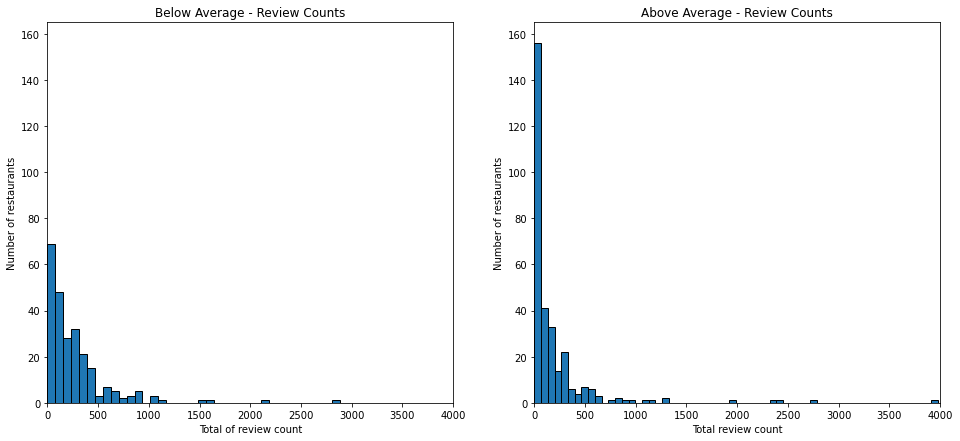

In [18]:
# Initialize a matplotlib subplot
import matplotlib.pyplot as plt
# with 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize=(16,7))
bins = 60

# Plot a histogram of below average review counts
# on the first axis
ax[0].hist(blw_avg_rev_cnts, bins=bins, edgecolor="black")

# Set the title for the first axis
# to "Below Average - Review Counts"
ax[0].set_title("Below Average - Review Counts")
ax[0].set_xlabel("Total of review count")
ax[0].set_ylabel("Number of restaurants");
ax[0].set_xlim(0, 4000)
ax[0].set_ylim(0, 165);

# Plot a histogram of above average review counts
# on the first axis
ax[1].hist(abv_avg_rev_cnts, bins=bins, edgecolor="black")

# Set the title for the first axis
# to "Above Average - Review Counts"
ax[1].set_title("Above Average - Review Counts");
ax[1].set_xlabel("Total review count")
ax[1].set_ylabel("Number of restaurants");
ax[1].set_xlim(0, 4000)
ax[1].set_ylim(0, 165);

**Interpret the above visualizations. What statistic is best suited for these data?**

Both graph distributions are skewed and are not symmetrical. Generally it's best to use the mean when the histogram is symmetrical. In this instance the median would do a better job of describing the center of this distribution than the mean. 

In the cell below, calculate the average review count for above average and below average restaurants.

In [19]:
# Import numpy
import numpy as np

# Replace None with your code
abv_avg_rev_cnt_center = np.average(abv_avg_rev_cnts) 
blw_avg_rev_cnt_center = np.average(blw_avg_rev_cnts) 

# Checking the median here
abv_avg_rev_cnt_median= np.median(abv_avg_rev_cnts) 
blw_avg_rev_cnt_median = np.median(blw_avg_rev_cnts) 

print('Average for "Above average review count":', abv_avg_rev_cnt_center)
print('Average for "Below average review count":', blw_avg_rev_cnt_center)

print('Median for "Above average review count":', abv_avg_rev_cnt_median)
print('Median for "Below average review count":', blw_avg_rev_cnt_median)

Average for "Above average review count": 189.3856209150327
Average for "Below average review count": 285.99595141700405
Median for "Above average review count": 65.5
Median for "Below average review count": 168.0


**Interpret the average review count for both groups. How does this relate to your client's claims?**

The client believes that restaurants with above average rating would likely to have a high review count.
However, the data shows that the number of review count is unrelated to the rating. In this instance when we calculate the median we can see that below average restaurants have a higher review count, similarily with the mean.



## Count the price option frequency

The `price` variable in the dataset is a string of dollar signs indicating how expensive a restaurant's price point is. 

In the cell below, write a for loop that counts how frequently a given price point appears for the `above_average` dataset

In [20]:
# Create an empty dictionary to store the
# counts for each price point
abv_avg_prices = {}

# Loop over the above average restaurants
for pizza_shop in above_average:

    # Isolate the price point for the restuarant
    price_rating = pizza_shop['price']
    
    # Check if the price has been added to the dictionary
    if  price_rating in abv_avg_prices:
        # If the price is already a key in the dictionary
        # Add one to the count for that price point
        abv_avg_prices[price_rating] = abv_avg_prices[price_rating] + 1
    else:
        # If the price has not been added to the dictionary
        # Else set the price as the key and the value as the integer `1`
        abv_avg_prices[price_rating] = 1
    
print(abv_avg_prices)

{'\\$': 74, '\\$\\$': 87, 'Unknown': 134, '\\$\\$\\$': 10, '\\$\\$\\$\\$': 1}


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [21]:
assert type(abv_avg_prices) == dict
assert len(abv_avg_prices) == 5
assert '\\$\\$\\$\\$' in abv_avg_prices

**Now reapply the same process, but instead calculate the price point frequencies for the `below_average` dataset.**

In [22]:
# Create an empty dictionary to store the
# counts for each price point
blw_avg_prices = {}

# Loop over the above average restaurants
for pizza_shop in below_average:

    # Isolate the price point for the restuarant
    price_rating = pizza_shop['price']
    
    # Check if the price has been added to the dictionary
    if  price_rating in blw_avg_prices:
        # If the price is already a key in the dictionary
        # Add one to the count for that price point
        blw_avg_prices[price_rating] = blw_avg_prices[price_rating] + 1
    else:
        # If the price has not been added to the dictionary
        # Else set the price as the key and the value as the integer `1`
        blw_avg_prices[price_rating] = 1
    
print(blw_avg_prices)

{'\\$\\$': 88, '\\$': 128, 'Unknown': 19, '\\$\\$\\$': 12}


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [23]:
assert type(blw_avg_prices) == dict
assert len(blw_avg_prices) == 4
assert '\\$' in blw_avg_prices

## Create a bar plot that sets the frequency of each price point as the y axis

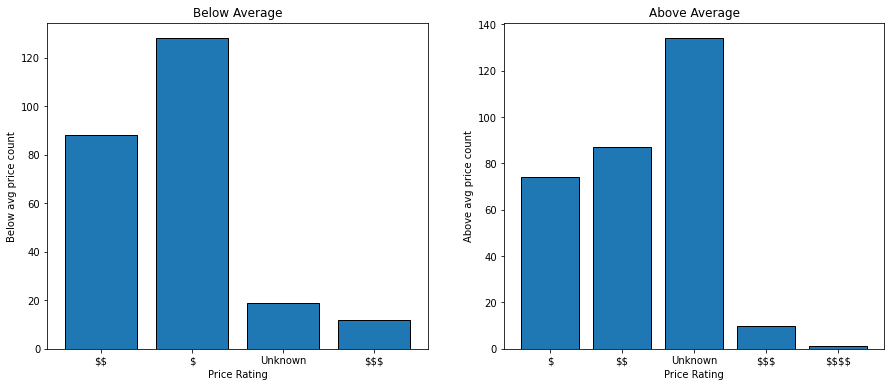

In [24]:
# Create a matplotlib subplot with 1 row and 2 columns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,6))


# Isolate keys of the below average price count dictionary
key_names = list(blw_avg_prices.keys())

# Isolate the values of the below average price count dictionary
# This will be the y-axis
values = list(blw_avg_prices.values())

# Plot the below average price point counts as a bar plot
# on the first axis
ax[0].bar(key_names, values, edgecolor="black");

# Set labels for X and Y axes

ax[0].set_xlabel("Price Rating");
ax[0].set_ylabel("Below avg price count");

# Set the title for the first axis
# to the string "Below Average"
ax[0].set_title("Below Average");

# Isolate keys of the above average price count dictionary
key_names = list(abv_avg_prices.keys())


# Isolate the values of the above average price count dictionary
values = list(abv_avg_prices.values())


# Plot the above average price counts as a bar plot
# on the second axis
ax[1].bar(key_names, values, edgecolor="black")

ax[1].set_xlabel("Price Rating")
ax[1].set_ylabel("Above avg price count")

# Set the title for the second axis to 
# the string 'Above Average'
ax[1].set_title("Above Average");


**Interpret the above visualization. How does it relate to your client's claims?**

The client believes that most restaurants with an above average rating have a high price point of `$$`'.
The most common price point is unknown, many restaurants that have an above average rating in the yelp data don't have a price point. There are 87 restaurants with a price point of `$$` and 74 restaurants with a price point of `$`. 
This doesn't justify a price increase based on rating.


## Analyze restaurant location

In the cell below, use the `isolate_values` function to isolate `longitude` and `latitude` for above and below average restaurants.

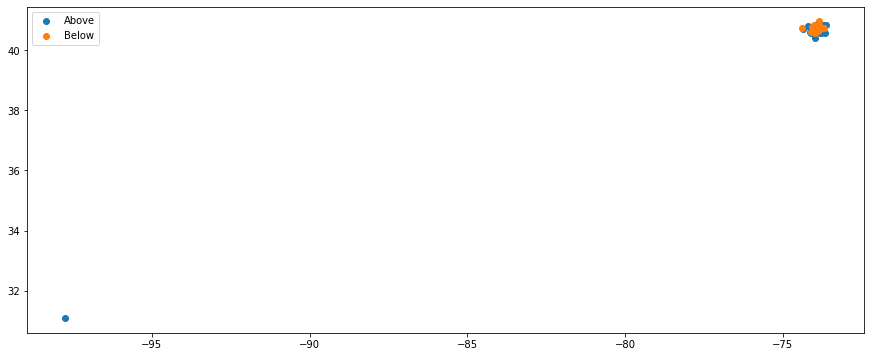

In [25]:
# Replace None with your code

# Isolate longitude for above average restaurants
abv_avg_lon = isolate_values(above_average, 'longitude')

# Isolate latitude for above average restaurants
abv_avg_lat = isolate_values(above_average, 'latitude')

# Isolate longitude for below average restaurants
blw_avg_lon = isolate_values(below_average, 'longitude')

# Isolate latitude for below average restaurants
blw_avg_lat = isolate_values(below_average, 'latitude')

plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

## Remove the outlier

There is one restaurant in the above average dataset with a location dramatically west and south of all other observations. Let's remove that restaurant from the above average dataset and regenerate the scatter plot.

In [26]:
# Create an empty list
# that will contain data with
# the outlier removed
no_outliers = []

# Create an empty list to append the outlier
outlier = []

# Loop over every restaurant in the above average dataset
for restaurant in above_average:
    
    # Isolate the restaurant's longitude
    restaurant_longitude = restaurant['longitude'] 
    
    # Check if the longitude value is greater than the integer -90
    if restaurant_longitude >= -90:
        
        # Append the restaurant to the no_outliers list
            no_outliers.append(restaurant)
        
    # If longitude is less than -90 it is an outlier
    # and should be appended to the outlier list
    else: outlier.append(restaurant)

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [27]:
assert type(no_outliers) == list
assert type(outlier) == list
assert len(no_outliers) == len(above_average) - 1
assert len(outlier) == 1

Now regenerate the longitude and latitude for above average restaurants using the `no_outliers` dataset, and regenerate the scatter plot!

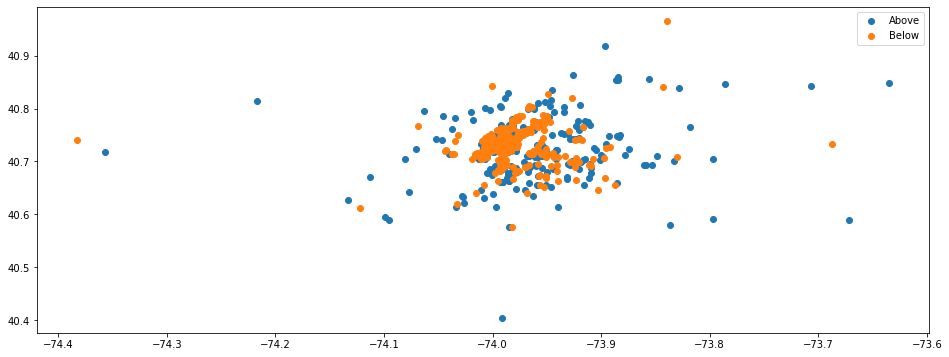

In [28]:
abv_avg_lon = isolate_values(no_outliers,'longitude')
abv_avg_lat = isolate_values(no_outliers,'latitude')

plt.figure(figsize=(16,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

Nice. This is much more interesting. 

## Plot the distribution of latitude and longitude

To get a better sense about how latitude and longitude are working, in the cell below plot histograms for latitude and longitude.

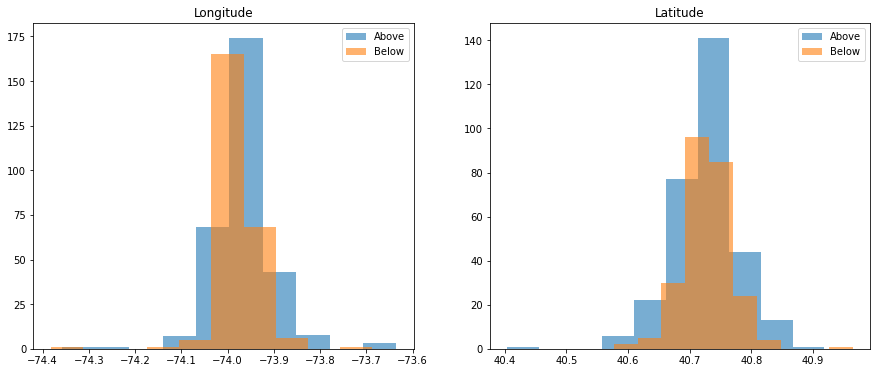

In [29]:
# Create a matplotlib subplot with 1 row and 2 columns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,6))

# Plot a histogram of above average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Above"
ax[0].hist(abv_avg_lon, alpha=0.6, label='Above');

# Plot a histogram of below average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Below"
ax[0].hist(blw_avg_lon, alpha=0.6, label='Below');
ax[0].legend();

# Set the title for the first subplot axis
# to the string "Longitude"
ax[0].set_title("Longitude")

# Plot a histogram of above average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Above"
ax[1].hist(abv_avg_lat, alpha=0.6, label='Above');

# Plot a histogram of below average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Below"
ax[1].hist(blw_avg_lat, alpha=0.6, label='Below');
ax[1].legend();

# Set the title for the second subplot axis
# to the string "Latitude"
ax[1].set_title("Latitude");


**Interpret the above visualization. How does it relate to your client's claims?**

The client claims that above average restaurants are usually further east and below average are usually further west, The data doesn't support this claim.
There is a central cluster with an even distribution of both above and below average restaurants. There seems to be a corelation between above average restaurants situated directly west and north east of that central cluster.



## Find the most common zipcode for above average restaurants

In the cell below, loop over the restaurants in the above average dataset and count the frequency of the restaurants zipcode.

In [31]:
# Create an empty dictionary
# This dictionary will hold the counts
# for each zipcode
abv_avg_zip_cnts = {}

# Loop over the above average dataset
for pizza_shop in above_average:
    
    # Isolate the restaurant's zipcode 
    zip_count = pizza_shop['location']['zip_code']
    
    # Check if the zipcode is a key in the dictionary
    if zip_count in abv_avg_zip_cnts:
        
        # Add one to the zipcode's value
        abv_avg_zip_cnts[zip_count] = abv_avg_zip_cnts[zip_count] + 1
    
    # If the zipcode is not a key
    # add it to the dictionary with a value of 1
    else:
        abv_avg_zip_cnts[zip_count] = 1
    
    
print(abv_avg_zip_cnts)

{'10012': 10, '11201': 8, '11211': 11, '11209': 4, '10028': 1, '11222': 8, '10014': 13, '10075': 2, '11205': 5, '10013': 9, '11217': 4, '10023': 3, '10009': 9, '10003': 10, '10016': 5, '11102': 1, '10022': 6, '11249': 1, '10010': 1, '10011': 6, '11215': 9, '10006': 2, '11237': 6, '11238': 3, '11218': 2, '10017': 5, '11101': 5, '11226': 4, '10019': 6, '10002': 9, '11231': 5, '10128': 1, '10065': 3, '11104': 3, '10001': 5, '10029': 2, '11221': 3, '76542': 1, '11373': 1, '10018': 6, '10027': 3, '11233': 2, '10032': 1, '07302': 2, '10038': 1, '11103': 3, '11385': 3, '11105': 4, '10004': 2, '10021': 1, '10036': 3, '10030': 1, '11418': 1, '10007': 3, '11207': 2, '10035': 1, '10461': 2, '11220': 1, '07094': 2, '11421': 3, '07020': 1, '07047': 5, '07305': 1, '11050': 1, '11212': 2, '11378': 3, '10454': 1, '11216': 3, '07087': 2, '11219': 2, '07901': 1, '07307': 2, '10270': 1, '11375': 1, '10302': 1, '07732': 1, '11213': 2, '10034': 1, '11379': 2, '10301': 1, '11214': 1, '10458': 3, '11432': 1,

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [32]:
assert type(abv_avg_zip_cnts) == dict
assert len(abv_avg_zip_cnts) == 104 or len(abv_avg_zip_cnts) == 103
assert '10012' in abv_avg_zip_cnts

Now loop over the `abv_avg_zip_cnts` dictionary and find the zipcode with the largest count. 

For this question, there are multiple ways to find the solution. Comments have not been provided.

In [33]:
zip_code = max(abv_avg_zip_cnts, key=abv_avg_zip_cnts.get)
all_values = abv_avg_zip_cnts.values()
largest_count = max(all_values)


print('Zip code:',zip_code)
print('Largest count:', largest_count) 

Zip code: 10014
Largest count: 13


In [34]:
maxi = 0

for key, value in abv_avg_zip_cnts.items():
    if value > maxi:
        maxi = value
        
print(maxi)

13


**Interpret the results. How does the most frequent zipcode relate to your client's claims?**

The client believe that the 10012 zipcode in New York City is the best place to open a restaurant. They believe the zipcode 10012 has the most highly rated restaurants in NYC.

The data shows that the highest number of above average restaurants are in the zip code 10014.

## Compile your findings into a report

You have address all of your client's claims! In the cell below, describe the findings of your analysis.

Findings:

-- Our analysis revealed that NYC restaurants (n=1000) have an average rating of 4.

-- We found that the number of review count is unrelated to a higher rating. Restaurants that have a below average rating have a higher average review count.

-- The relationship between rating and price is unrelated. 

--The most common price point amongst above average restaurants is in fact unknown, many restaurants that have an above average rating in the yelp data do not have a price point. There are 87 restaurants with a price point of $$ and 74 restaurants with a price point of $, this doesn't justify a price increase based on rating.

-- There is no indication that changing your price point will increase or decrease your average rating.


-- There is a central cluster with an even distribution of both above and below average restaurants. There seems to be a corelation between above average restaurants situated directly west and north east of that central cluster. 


-- The data shows that the highest number of above average restaurants are in the zip code 10014.



# Summary

Well done! As you can see, manipulating nested data stuctures can be a challenging task. Pulling information from json objects requires a thoughtful inspection of how the data is organized, and code that allows you to avoid repetition.